In [1]:
from barrier3d import Barrier3d
from cascade.outwasher import Outwasher
from matplotlib import pyplot as plt
import numpy as np

In [2]:
b3d = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/Barrier3d/tests/test_params/")
b3d.update()
b3d.update_dune_domain()
outwash = Outwasher(
            datadir="C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/",
            outwash_years="outwash_years.npy",
            outwash_bay_levels="outwash_bay_levels.npy",
            time_step_count=b3d._TMAX,
            berm_elev=b3d._BermEl,
            barrier_length=b3d._BarrierLength,
            sea_level=b3d._SL,
            bay_depth=-b3d._BayDepth,
            interior_domain=b3d.InteriorDomain,
            dune_domain=b3d.DuneDomain[b3d._time_index - 1],
            substep=1,
            sediment_flux_coefficient_Cx=10,
            sediment_flux_coefficient_Ki=2E-3,  # b3d = 7.5E-6 for inundation
            max_slope=-0.25)
outwash.update(b3d)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
The outwash storm has ended.


In [3]:
outwash._Qs_shoreface[1] # m^3

1691.6076377944369

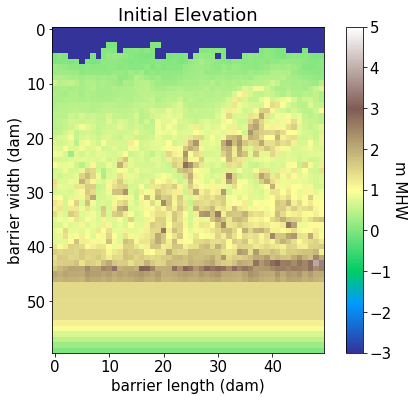

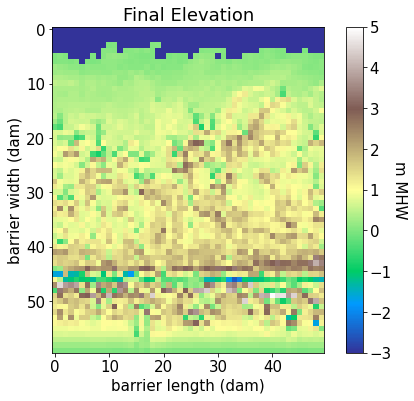

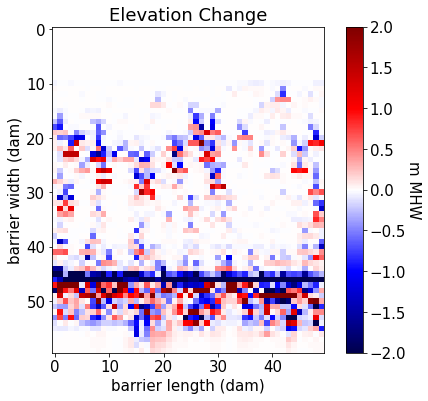

In [4]:
initial_domain = outwash._initial_full_domain
final_domain = outwash._full_domain
domain_change = final_domain-initial_domain

plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({"font.size": 15})

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    initial_domain*10,
    cmap="terrain",
    vmin=-3.0, vmax=5.0,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax1.set_title("Initial Elevation")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()
# fig1.savefig(newpath + "0_domain", facecolor='w')

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain[:, :]*10,
    cmap="terrain",
    vmin=-3.0, vmax=5.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("Final Elevation")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)
# fig2.savefig(newpath + "final_domain", facecolor='w')

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change*10,
    cmap="seismic",
    vmin=-2, vmax=2,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('m MHW', rotation=270, labelpad=15)
# fig3.savefig(newpath + "elev_change_domain", facecolor='w')


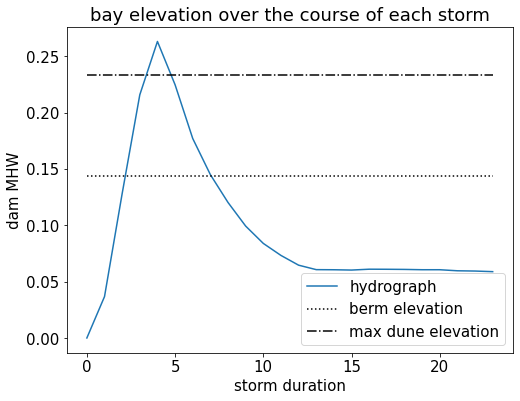

In [5]:
### HYDROGRAPH------------------------------------------------------------------------------------------------------------------
# plot the bay elevation throughout each storm with sea level and beach elevation references
# plt.rcParams['figure.figsize'] = (8,5)

bay_levels = outwash._final_bay_levels
duration = len(bay_levels)
x = range(0, duration)
beach_elev_line = outwash._beach_elev * np.ones(len(x))
dune_elev_line = max(outwash._full_dunes[0]) * np.ones(len(x))

fig5 = plt.figure()
ax5 = fig5.add_subplot(111)
ax5.plot(x, bay_levels, label="hydrograph")
# if we have multiple storms, will only need to plot these once
ax5.plot(x, beach_elev_line, 'k', linestyle='dotted', label='berm elevation')
ax5.plot(x, dune_elev_line, 'k', linestyle='dashdot', label='max dune elevation')
ax5.set_xlabel("storm duration")
ax5.set_ylabel("dam MHW")
ax5.set_title("bay elevation over the course of each storm")
ax5.legend(loc="lower right")
plt.show()
# fig5.savefig(newpath + "hydrograph", facecolor='w')
plt.close()

In [6]:
from scripts.outwash_ms.plotters_outwash import (plot_ElevAnimation, plot_DischargeAnimation, plot_FRarray)

In [7]:
plt.rcParams.update({"font.size": 15})
start = outwash._OW_TS[0]
stop = outwash._OW_TS[-1]
# stop = start+200
path = "D:/NC State/Outwasher/Output/full_hydro/new_FRA/avgs/"
runID = "Kie-3_substep1_B3D_extra_row_C0_10x10"
newpath = path + runID + "/"
# plot_ElevAnimation(elev_change, newpath, start, stop)
plot_DischargeAnimation(outwash._discharge[1], newpath, start, stop)
plot_FRarray(outwash._flow_routing_cellular_array[1], newpath, start, stop)


[ * discharge GIF successfully generated * ]

[ * FRA array GIF successfully generated * ]
